## N1 HEALTH DATA CHALLENGE - GINA BARBAGALLO

In [1]:
import sqlite3 
import pandasql as ps
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
!pip install geopandas 
import geopandas as gpd
from IPython.display import Image
!pip install xlrd

In [2]:
#connecting the SQLite database
#connection object
db = sqlite3.connect("/Users/ginabarbagallo/Downloads/challenge.db")
#cursor
cursor = db.cursor()

In [3]:
#get table names
table_names_query = """SELECT name FROM sqlite_master WHERE type='table';"""

In [4]:
#execute query
cursor.execute(table_names_query)

In [5]:
print(cursor.fetchall())

[('five_hundred_cities',), ('access',), ('variable_list',)]


The tables available in the database are 500 Cities, Food Access and the Variable List. 

## DATASETS

In [6]:
five_hundred_cities = pd.read_sql_query("SELECT * FROM five_hundred_cities", db)
five_hundred_cities.head(20)

,index,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,...,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,...,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,...,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,...,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,...,"(82.2, 87.1)",25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"
5,5,AL,Birmingham,107000,1073000800,0107000-01073000800,3859,24.5,"(20.9, 28.3)",37.5,...,"(82.3, 87.2)",22.0,"(19.7, 24.2)",44.8,"(43.3, 46.1)",7.9,"( 7.1, 8.7)",28.4,"(20.3, 37.2)","(33.54969778900, -86.8330944744)"
6,6,AL,Birmingham,107000,1073001100,0107000-01073001100,5354,17.5,"(14.1, 21.3)",32.5,...,"(83.8, 88.6)",15.9,"(14.1, 17.9)",42.4,"(40.5, 44.3)",5.3,"( 4.7, 6.0)",19.2,"(13.2, 27.5)","(33.54291433250, -86.8756782852)"
7,7,AL,Birmingham,107000,1073001200,0107000-01073001200,2876,22.5,"(20.1, 25.0)",33.7,...,"(83.6, 87.0)",18.2,"(16.9, 19.5)",43.4,"(42.3, 44.5)",6.3,"( 5.7, 6.9)",25.6,"(19.4, 32.3)","(33.52787677060, -86.8604161686)"
8,8,AL,Birmingham,107000,1073001400,0107000-01073001400,2181,21.5,"(18.2, 25.0)",34.5,...,"(83.5, 88.0)",17.6,"(15.7, 19.6)",42.8,"(41.2, 44.3)",6.5,"( 5.7, 7.3)",24.8,"(16.3, 34.1)","(33.52614972580, -86.8351466060)"
9,9,AL,Birmingham,107000,1073001500,0107000-01073001500,3189,25.5,"(22.5, 28.8)",33.2,...,"(82.6, 86.1)",21.1,"(19.5, 22.8)",46.5,"(45.2, 47.5)",6.8,"( 6.3, 7.4)",34.2,"(26.5, 41.2)","(33.52987273420, -86.8197191685)"


In [7]:
five_hundred_cities.shape

(27210, 64)

In [8]:
print(five_hundred_cities['PlaceName'].value_counts())

print(five_hundred_cities['PlaceName'].nunique())

PlaceName
New York          2117
Los Angeles        994
Chicago            794
Houston            552
Philadelphia       376
                  ... 
Mount Pleasant      11
Perris              10
Pharr                9
Fishers              9
Meridian             8
Name: count, Length: 474, dtype: int64
474


In [9]:
food_access = pd.read_sql_query("SELECT * FROM access", db)
food_access.head(10)

,index,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990
5,5,1011,AL,Bullock,4089.983548,4141.900365,1.269365,37.474652,37.950342,2199.359828,...,24.078889,0.220624,0.968748,0.008876,7.705288,0.070600,0.000000,0.000000,36.523171,0.334645
6,6,1013,AL,Butler,1307.819706,1304.328756,-0.266929,6.243470,6.226805,593.225139,...,11.084902,0.052919,4.955498,0.023657,7.298759,0.034844,0.000000,0.000000,11.440987,0.054619
7,7,1015,AL,Calhoun,30901.150585,27785.986765,-10.081061,26.061086,23.433852,11909.162858,...,970.893191,0.818822,235.071203,0.198252,118.296515,0.099768,21.961507,0.018522,886.573464,0.747709
8,8,1017,AL,Chambers,6748.213223,7131.505717,5.679911,19.722967,20.843214,3018.284747,...,126.786631,0.370559,108.493406,0.317093,20.688146,0.060465,0.061101,0.000179,104.189620,0.304514
9,9,1019,AL,Cherokee,79.410235,103.522499,30.364177,0.305553,0.398332,34.483862,...,0.348952,0.001343,0.000000,0.000000,0.217045,0.000835,0.000000,0.000000,1.003705,0.003862


In [10]:
food_access.describe()

,index,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
count,3143.000000,3143.000000,3143.000000,3124.000000,3.117000e+03,3143.000000,3124.000000,3143.000000,3123.000000,3.115000e+03,...,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000
mean,1571.000000,30390.411709,20156.653242,19287.747386,7.180008e+03,23.559330,23.084470,5551.776559,5833.959524,7.318957e+03,...,2326.081648,2.021269,695.064178,0.249350,230.259498,0.804746,32.204247,0.019207,1290.799156,1.154542
std,907.450274,15164.717720,51308.865791,47803.525596,3.955676e+05,20.250176,19.602745,13862.922934,13989.348252,4.004692e+05,...,12159.928409,5.030497,3466.438554,0.693856,1387.887687,4.835109,435.841952,0.134887,5414.425184,1.864479
min,0.000000,1001.000000,0.000000,0.000000,-1.000000e+02,0.000000,0.000000,0.000000,0.000000,-1.000000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,785.500000,18178.000000,1661.076794,1631.358726,-1.091343e+01,10.847099,10.927326,592.983070,608.235919,-1.232638e+01,...,31.131894,0.197446,3.328667,0.027088,5.274117,0.026997,0.000000,0.000000,33.382261,0.221558
50%,1571.000000,29177.000000,4097.827186,4131.174278,-6.239322e-02,19.685956,19.200682,1500.780036,1636.858816,3.486028e+00,...,136.051404,0.579669,16.473665,0.085588,20.850829,0.072033,1.000000,0.003242,132.098182,0.572597
75%,2356.500000,45082.000000,12954.123206,13119.029389,7.262080e+00,29.581054,28.862231,4591.067541,4859.016156,2.352342e+01,...,874.891533,1.673132,130.916653,0.249311,101.353615,0.186646,7.107201,0.013054,658.924526,1.318699
max,3142.000000,56045.000000,886068.668386,740267.412661,2.208376e+07,100.000001,100.000001,292541.789025,259479.516033,2.234893e+07,...,263440.500070,79.323968,76998.348562,25.087551,40350.800429,83.844210,21387.063061,4.469546,115781.021513,27.120652


In [11]:
food_access.shape

(3143, 45)

In [12]:
variable_list = pd.read_sql_query("SELECT * FROM variable_list", db)
variable_list.head(20)

,index,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
0,0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent
5,5,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store, 2010",LACCESS_LOWI10,CNTY10,Count
6,6,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store, 2015",LACCESS_LOWI15,CNTY10,Count
7,7,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store (% change), 2...",PCH_LACCESS_LOWI_10_15,CNTY10,% change
8,8,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store (%), 2010",PCT_LACCESS_LOWI10,CNTY10,Percent
9,9,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store (%), 2015",PCT_LACCESS_LOWI15,CNTY10,Percent


In [13]:
variable_list.shape

(281, 8)

## Checking NA values

In [14]:
na_five_hundred_cities = five_hundred_cities.isna().sum().reset_index()
na_five_hundred_cities.columns = ['Column', 'Null Count']
print(na_five_hundred_cities.sort_values(by = "Null Count", ascending = False).head(20))

                    Column  Null Count
54       PAPTEST_Crude95CI        2202
53       PAPTEST_CrudePrev        2202
34         COREW_Crude95CI         109
33         COREW_CrudePrev         109
31         COREM_CrudePrev         103
32         COREM_Crude95CI         103
62     TEETHLOST_Crude95CI          60
61     TEETHLOST_CrudePrev          60
48      MAMMOUSE_Crude95CI          37
47      MAMMOUSE_CrudePrev          37
28  COLON_SCREEN_Crude95CI          19
27  COLON_SCREEN_CrudePrev          19
8        ACCESS2_Crude95CI           1
7        ACCESS2_CrudePrev           1
58         SLEEP_Crude95CI           0
43        KIDNEY_CrudePrev           0
37        DENTAL_CrudePrev           0
38        DENTAL_Crude95CI           0
39      DIABETES_CrudePrev           0
40      DIABETES_Crude95CI           0


In [15]:
na_food_access = food_access.isna().sum().reset_index()
na_food_access.columns = ['Column', 'Null Count']
print(na_food_access.sort_values(by = "Null Count", ascending = False).head(30))

                       Column  Null Count
23        LACCESS_CHILD_10_15          28
11     PCH_LACCESS_LOWI_10_15          28
28  PCH_LACCESS_SENIORS_10_15          26
6       PCH_LACCESS_POP_10_15          26
20         PCT_LACCESS_SNAP15          20
19             LACCESS_SNAP15          20
10             LACCESS_LOWI15          20
13         PCT_LACCESS_LOWI15          20
22            LACCESS_CHILD15          19
34        PCT_LACCESS_BLACK15          19
30      PCT_LACCESS_SENIORS15          19
31            LACCESS_WHITE15          19
32        PCT_LACCESS_WHITE15          19
33            LACCESS_BLACK15          19
36         PCT_LACCESS_HISP15          19
35             LACCESS_HISP15          19
25        PCT_LACCESS_CHILD15          19
37          LACCESS_NHASIAN15          19
38      PCT_LACCESS_NHASIAN15          19
39             LACCESS_NHNA15          19
40         PCT_LACCESS_NHNA15          19
41             LACCESS_NHPI15          19
42         PCT_LACCESS_NHPI15     

## JOINING DATA
To match the food_access data with five_hundred_cities, it must match a geographic code for the correct county and state. A left join would add the columns from food access to the columns in 500 cities with the values corresponding to that county and state pair. 

Issue 1: The FIPS code in food access for state + county has some observations with 4 characters instead of 5. Adding leading zeros to the FIPS column where the codes have 4 characters would allow us to show the first 0 for state codes such as Alabama, which is 01. 

In [16]:
food_access['FIPS'] = food_access['FIPS'].apply(lambda x: str(x).zfill(5))

In [17]:
food_access.head(1)

,index,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,0,01001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,...,471.136164,0.863345,86.767975,0.159,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808


The same needs to be done with TractFIPS from the five_hundred_cities table. 

In [18]:
five_hundred_cities['TractFIPS'] = five_hundred_cities['TractFIPS'].apply(lambda x: str(x).zfill(11))

In [19]:
five_hundred_cities.head(1)

,index,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,0,AL,Birmingham,107000,01073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,...,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"


New column that has the state + county to match with food_access dataframe

In [20]:
five_hundred_cities['CountyFIPS'] = five_hundred_cities['TractFIPS'].str.slice(0,5)

In [21]:
five_hundred_cities.head(2)

,index,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,CountyFIPS
0,0,AL,Birmingham,107000,01073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,...,20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)",01073
1,1,AL,Birmingham,107000,01073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,...,22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)",01073


Left Join

In [22]:
five_hundred_cities_with_access = pd.merge(five_hundred_cities, food_access, how = 'left', left_on = 'CountyFIPS' , right_on = 'FIPS')

In [23]:
five_hundred_cities_with_access.head(5)

,index_x,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,0,AL,Birmingham,107000,01073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462
1,1,AL,Birmingham,107000,01073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462
2,2,AL,Birmingham,107000,01073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462
3,3,AL,Birmingham,107000,01073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462
4,4,AL,Birmingham,107000,01073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462


In [24]:
five_hundred_cities_with_access.shape

(27210, 110)

In [25]:
na_five_hundred_cities_with_access = five_hundred_cities_with_access.isna().sum().reset_index()
na_five_hundred_cities_with_access.columns = ['Column', 'Null Count']
print(na_five_hundred_cities_with_access.sort_values(by = "Null Count", ascending = False).head(50))

                        Column  Null Count
54           PAPTEST_Crude95CI        2202
53           PAPTEST_CrudePrev        2202
33             COREW_CrudePrev         109
34             COREW_Crude95CI         109
31             COREM_CrudePrev         103
32             COREM_Crude95CI         103
62         TEETHLOST_Crude95CI          60
61         TEETHLOST_CrudePrev          60
83          PCT_LACCESS_HHNV15          38
87             LACCESS_CHILD15          38
85          PCT_LACCESS_SNAP15          38
80              LACCESS_HHNV15          38
81      PCH_LACCESS_HHNV_10_15          38
90         PCT_LACCESS_CHILD15          38
78          PCT_LACCESS_LOWI15          38
76      PCH_LACCESS_LOWI_10_15          38
75              LACCESS_LOWI15          38
73           PCT_LACCESS_POP15          38
71       PCH_LACCESS_POP_10_15          38
70               LACCESS_POP15          38
88         LACCESS_CHILD_10_15          38
109       PCT_LACCESS_MULTIR15          38
84         

In [26]:
five_hundred_cities_with_access = five_hundred_cities_with_access.drop('StateAbbr', axis=1)

# EXPLORATORY DATA ANALYSIS
For the sake of time, I will exclusively use the values for 2015 in the food_access dataset to align better with the values in the five_hundred_cities dataset from 2017. If I had more time, I would take advantage of the 2010 variables and the % change to predict the values for the following years. 

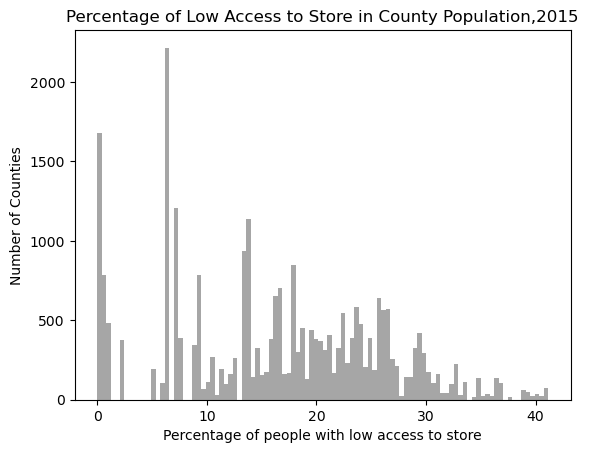

In [27]:
plt.hist(five_hundred_cities_with_access['PCT_LACCESS_POP15'],bins = 100, color = 'grey', alpha = 0.7)
plt.title("Percentage of Low Access to Store in County Population,2015")
plt.ylabel("Number of Counties"),
plt.xlabel("Percentage of people with low access to store");

As we can see in the histogram, some counties in the United States have over 30% of the population with low access to stores. Depending on the number of people the program could target, we would select the number of counties participating in the program. As the main users of Medicare Advantage are seniors, it's important to look at the distribution of the values for seniors with low access to stores in the area. 

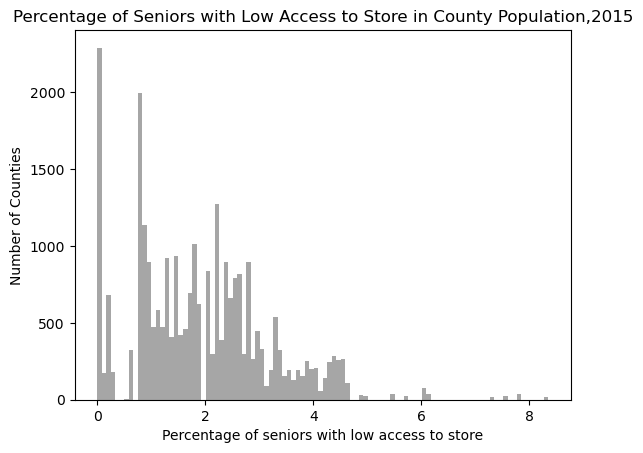

In [28]:
plt.hist(five_hundred_cities_with_access['PCT_LACCESS_SENIORS15'],bins = 100, color = 'grey', alpha = 0.7)
plt.title("Percentage of Seniors with Low Access to Store in County Population,2015")
plt.ylabel("Number of Counties"),
plt.xlabel("Percentage of seniors with low access to store");

To answer the questions, the goal is to create a scoring model that determines which counties have the biggest food access problems for the members with medicare advantage. Although Medicare Advantage is for people older than 65 or younger people with long-term disabilities, for the sake of the exercise, I will specifically focus on the population older than 65. To do this, I will use the variables most representative of access to food and assign a weight to each to achieve a final score for each county.

To understand the reasons behind and  the consequences of food access challenges, I used the following resources:
https://www.feedingamerica.org/hunger-in-america/food-insecurity
https://www.nimhd.nih.gov/resources/understanding-health-disparities/food-accessibility-insecurity-and-health-outcomes.html
https://www.feedingamerica.org/hunger-in-america/impact-of-hunger/hunger-and-nutrition

The main reasons include:
Poverty
Unemployment
Distance to grocery stores
Lack of grocery stores
Transportation
Job loss
Rural areas
Disabilities
Homelessness
Car ownership

And consequences to help identify populations with current possible food access challenges: 
Chronic health conditions
Obesity
High blood pressure
Diabetes
Psychological and Behavioral Issues
Cancer
Asthma
Arthritis
Poor oral health

These resources were used to determine the variables I will be using for my scoring, which include: 
Population, low access to store (%), 2015 - PCT_LACCESS_POP15 
Low income & low access to store (%), 2015 - PCT_LACCESS_LOWI15
Households, no car & low access to store (%), 2015 - PCT_LACCESS_HHNV15
Seniors, low access to store (%), 2015 - PCT_LACCESS_SENIORS15
Model-based estimate for crude prevalence of arthritis among adults aged >=18 years, 2017 - ARTHRITIS_CrudePrev
Model-based estimate for crude prevalence of high blood pressure among adults aged >=18 years, 2017 - BPHIGH_CrudePrev
Model-based estimate for crude prevalence of taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure, 2017 - BPMED_CrudePrev
Model-based estimate for crude prevalence of current asthma among adults aged >=18 years, 2017 - CASTHMA_CrudePrev
Model-based estimate for crude prevalence of coronary heart disease among adults aged >=18 years, 2017 - CHD_CrudePrev
Model-based estimate for crude prevalence of diagnosed diabetes among adults aged >=18 years, 2017 - DIABETES_CrudePrev
Model-based estimate for crude prevalence of no leisure-time physical activity among adults aged >=18 years, 2017 - LPA_CrudePrev
Model-based estimate for crude prevalence of mental health not good for >=14 days among adults aged >=18 years, 2017 - MHLTH_CrudePrev
Model-based estimate for crude prevalence of obesity among adults aged >=18 years, 2017 - OBESITY_CrudePrev
Model-based estimate for crude prevalence of all teeth lost among adults aged >=65 years, 2016 - TEETHLOST_CrudePrev



# QUESTION 1
To answer question 1: Where should we deploy a food access program? I determined the counties with the biggest problems in food access for every state in the United States; this was done with a score for each county. I used a map of the United States by county to visualize the information clearly and easily identify the counties.

SCORING MODEL CREATION

In [29]:
#keeping only the selected variables
selected_variables = [
    "PCT_LACCESS_POP15",
    "PCT_LACCESS_LOWI15",
    "PCT_LACCESS_HHNV15",
    "PCT_LACCESS_SENIORS15",
    "ARTHRITIS_CrudePrev",
    "BPHIGH_CrudePrev",
    "BPMED_CrudePrev",
    "CASTHMA_CrudePrev",
    "CHD_CrudePrev",
    "DIABETES_CrudePrev",
    "LPA_CrudePrev",
    "MHLTH_CrudePrev",
    "OBESITY_CrudePrev",
    "TEETHLOST_CrudePrev",
    "Place_TractID",
    "FIPS", 
    "PlaceName"
]
#keep the columns of selected variables
variables_scoring_df = five_hundred_cities_with_access[selected_variables]
print(variables_scoring_df.head(1))

   PCT_LACCESS_POP15  PCT_LACCESS_LOWI15  PCT_LACCESS_HHNV15  \
0          31.232876           12.271591            2.742854   

   PCT_LACCESS_SENIORS15  ARTHRITIS_CrudePrev  BPHIGH_CrudePrev  \
0               3.944113                 31.2              47.7   

   BPMED_CrudePrev  CASTHMA_CrudePrev  CHD_CrudePrev  DIABETES_CrudePrev  \
0             77.8               13.4            7.8                17.4   

   LPA_CrudePrev  MHLTH_CrudePrev  OBESITY_CrudePrev  TEETHLOST_CrudePrev  \
0           44.0             20.5               46.4                 28.9   

         Place_TractID   FIPS   PlaceName  
0  0107000-01073000100  01073  Birmingham  


In [30]:
print(variables_scoring_df.describe())

       PCT_LACCESS_POP15  PCT_LACCESS_LOWI15  PCT_LACCESS_HHNV15  \
count       27172.000000        27172.000000        27172.000000   
mean           16.125837            4.981841            1.074720   
std             9.704116            3.754531            0.823297   
min             0.000126            0.000000            0.000000   
25%             7.194721            1.699944            0.440562   
50%            16.454869            4.399473            0.980829   
75%            23.608373            7.421922            1.492027   
max            41.156664           22.627832            5.428953   

       PCT_LACCESS_SENIORS15  ARTHRITIS_CrudePrev  BPHIGH_CrudePrev  \
count           27172.000000         27210.000000      27210.000000   
mean                1.921985            21.430129         30.653208   
std                 1.266122             5.995361          8.260472   
min                 0.000000             2.400000          5.300000   
25%                 0.998529    

In [31]:
#CORRELATIONS
correlation_matrix = variables_scoring_df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                       PCT_LACCESS_POP15  PCT_LACCESS_LOWI15  \
PCT_LACCESS_POP15               1.000000            0.862516   
PCT_LACCESS_LOWI15              0.862516            1.000000   
PCT_LACCESS_HHNV15              0.820167            0.874002   
PCT_LACCESS_SENIORS15           0.894224            0.714752   
ARTHRITIS_CrudePrev             0.263777            0.248859   
BPHIGH_CrudePrev                0.210013            0.271228   
BPMED_CrudePrev                 0.109460            0.131834   
CASTHMA_CrudePrev               0.100331            0.087390   
CHD_CrudePrev                   0.149890            0.201253   
DIABETES_CrudePrev              0.085042            0.177760   
LPA_CrudePrev                   0.157972            0.257189   
MHLTH_CrudePrev                 0.157063            0.213178   
OBESITY_CrudePrev               0.337607            0.396686   
TEETHLOST_CrudePrev             0.133655            0.186675   

                       PCT_LACCESS_HHNV

To determine the weights, I based on the factors I found most mentioned in the research, as well as prioritizing the variables that contained data specifically for seniors (people over >65). Of course, in a longer project this should not be done in this way, but with expert knowledge and other analytical methods.


In [32]:
#determine the weights for every variable
#Since some are highly correlated variables, I narrowed it down:
weights = {
    "PCT_LACCESS_LOWI15": 12.121212121212121,
    "PCT_LACCESS_HHNV15": 12.121212121212121,
    "PCT_LACCESS_SENIORS15": 18.181818181818183,
    "ARTHRITIS_CrudePrev": 6.0606060606060606,  
    "BPHIGH_CrudePrev": 9.090909090909092,
    "CASTHMA_CrudePrev": 6.0606060606060606,
    "DIABETES_CrudePrev": 9.090909090909092,
    "MHLTH_CrudePrev": 3.0303030303030303,
    "OBESITY_CrudePrev": 9.090909090909092,
    "TEETHLOST_CrudePrev": 9.090909090909092
}

In [33]:
#drop the variables we decided to remove
dropped = ['PCT_LACCESS_POP15', 'BPMED_CrudePrev', 'CHD_CrudePrev', 'LPA_CrudePrev']
variables_scoring_df = variables_scoring_df.drop(columns = dropped)


In [34]:
#SCORING 
non_scoring_columns = ['Place_TractID', 'FIPS', 'PlaceName']
scoring_columns = variables_scoring_df.drop(columns = non_scoring_columns)

scoring_columns = scoring_columns/100

scoring_columns['Score'] = scoring_columns.dot(pd.Series(weights))

scoring_columns.describe()

,PCT_LACCESS_LOWI15,PCT_LACCESS_HHNV15,PCT_LACCESS_SENIORS15,ARTHRITIS_CrudePrev,BPHIGH_CrudePrev,CASTHMA_CrudePrev,DIABETES_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,TEETHLOST_CrudePrev,Score
count,27172.000000,27172.000000,27172.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27150.000000,27112.000000
mean,0.049818,0.010747,0.019220,0.214301,0.306532,0.097414,0.108111,0.139210,0.304729,0.161081,11.408674
std,0.037545,0.008233,0.012661,0.059954,0.082605,0.017105,0.042694,0.036173,0.081807,0.087802,3.149240
min,0.000000,0.000000,0.000000,0.024000,0.053000,0.056000,0.008000,0.042000,0.096000,0.028000,3.351973
25%,0.016999,0.004406,0.009985,0.173000,0.253000,0.085000,0.079000,0.112000,0.245000,0.092000,9.126097
50%,0.043995,0.009808,0.017611,0.210000,0.295000,0.094000,0.100000,0.135000,0.295000,0.141000,10.928414
75%,0.074219,0.014920,0.026386,0.251000,0.349000,0.107000,0.129000,0.164000,0.356000,0.213000,13.203550
max,0.226278,0.054290,0.083495,0.584000,0.703000,0.178000,0.395000,0.326000,0.586000,0.570000,24.985972


In [35]:
scoring_columns.head(10)

,PCT_LACCESS_LOWI15,PCT_LACCESS_HHNV15,PCT_LACCESS_SENIORS15,ARTHRITIS_CrudePrev,BPHIGH_CrudePrev,CASTHMA_CrudePrev,DIABETES_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,TEETHLOST_CrudePrev,Score
0,0.122716,0.027429,0.039441,0.312,0.477,0.134,0.174,0.205,0.464,0.289,18.624923
1,0.122716,0.027429,0.039441,0.305,0.482,0.125,0.198,0.212,0.478,0.329,19.303711
2,0.122716,0.027429,0.039441,0.315,0.491,0.133,0.184,0.188,0.457,0.286,18.712802
3,0.122716,0.027429,0.039441,0.350,0.541,0.136,0.224,0.194,0.480,0.340,20.479468
4,0.122716,0.027429,0.039441,0.363,0.565,0.147,0.250,0.231,0.527,0.432,22.455226
5,0.122716,0.027429,0.039441,0.375,0.573,0.134,0.241,0.181,0.482,0.284,20.534014
6,0.122716,0.027429,0.039441,0.325,0.500,0.124,0.180,0.146,0.423,0.192,17.473408
7,0.122716,0.027429,0.039441,0.337,0.522,0.120,0.202,0.157,0.444,0.256,18.727953
8,0.122716,0.027429,0.039441,0.345,0.530,0.119,0.204,0.148,0.431,0.248,18.643105
9,0.122716,0.027429,0.039441,0.332,0.529,0.132,0.213,0.191,0.480,0.342,20.146135


In [36]:
final_scoring_df = pd.concat([variables_scoring_df[non_scoring_columns], scoring_columns['Score']], axis=1)
final_scoring_df.head(10)

,Place_TractID,FIPS,PlaceName,Score
0,0107000-01073000100,01073,Birmingham,18.624923
1,0107000-01073000300,01073,Birmingham,19.303711
2,0107000-01073000400,01073,Birmingham,18.712802
3,0107000-01073000500,01073,Birmingham,20.479468
4,0107000-01073000700,01073,Birmingham,22.455226
5,0107000-01073000800,01073,Birmingham,20.534014
6,0107000-01073001100,01073,Birmingham,17.473408
7,0107000-01073001200,01073,Birmingham,18.727953
8,0107000-01073001400,01073,Birmingham,18.643105
9,0107000-01073001500,01073,Birmingham,20.146135


The score I created was for each row, which represented the different census tracts in every county. To obtain a county-wide score, I will average the scores for each county based on their FIPS code. 

In [37]:
score_by_county = final_scoring_df.groupby('FIPS')['Score'].mean().reset_index()
score_by_county.head(5)

,FIPS,Score
0,01073,15.941950
1,01083,10.737781
2,01089,13.965716
3,01097,16.104236
4,01101,16.115703


In [38]:
#loading the geospatial data in order to create visualization
shapefile_path = '/Users/ginabarbagallo/Downloads/c_18mr25/c_18mr25.shp'
geo = gpd.read_file(shapefile_path)
print(geo.head())

  STATE  CWA     COUNTYNAME   FIPS TIME_ZONE FE_AREA       LON      LAT  \
0    ME  CAR     Washington  23029         E      se  -67.6361  45.0363   
1    GA  CHS       McIntosh  13191         E      se  -81.2646  31.5329   
2    GA  CHS        Liberty  13179         E      se  -81.2103  31.7093   
3    AS  PPG  Swains Island  60040         S    None -171.0802 -11.0548   
4    AS  PPG         Manu'a  60020         S    None -169.5060 -14.2219   

                                            geometry  
0  MULTIPOLYGON (((-67.93539 44.40382, -67.93643 ...  
1  MULTIPOLYGON (((-81.46814 31.3398, -81.46747 3...  
2  POLYGON ((-81.30807 31.79454, -81.30546 31.791...  
3  POLYGON ((-171.07475 -11.05295, -171.07366 -11...  
4  MULTIPOLYGON (((-169.60973 -14.15779, -169.609...  


In [39]:
print(geo['FIPS'].value_counts()) #There seem to be duplicates in the dataset - there are multiple rows for one FIPS

FIPS
64001    6
15009    4
69085    4
12087    4
26127    2
        ..
13239    1
13061    1
13121    1
37111    1
02105    1
Name: count, Length: 3269, dtype: int64


In [40]:
#removing FIPS duplicates
geo = geo.drop_duplicates(subset='FIPS', keep='first')

The join between the geospatial data and five_hundred_cities_with_access will be done using the FIPS code.

In [41]:
geo_cities_with_access = pd.merge(five_hundred_cities_with_access, geo, how = 'left', left_on = 'CountyFIPS' , right_on = 'FIPS')
geo_cities_with_access = geo_cities_with_access.drop(columns=['index_x'])
geo_cities_with_access.head(20)

,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,...,PCT_LACCESS_MULTIR15,STATE,CWA,COUNTYNAME,FIPS_y,TIME_ZONE,FE_AREA,LON,LAT,geometry
0,Birmingham,107000,01073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",10.3,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."
1,Birmingham,107000,01073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",10.5,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."
2,Birmingham,107000,01073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",10.4,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."
3,Birmingham,107000,01073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",9.1,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."
4,Birmingham,107000,01073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",7.6,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."
5,Birmingham,107000,01073000800,0107000-01073000800,3859,24.5,"(20.9, 28.3)",37.5,"(36.0, 39.0)",8.6,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."
6,Birmingham,107000,01073001100,0107000-01073001100,5354,17.5,"(14.1, 21.3)",32.5,"(31.0, 34.1)",9.9,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."
7,Birmingham,107000,01073001200,0107000-01073001200,2876,22.5,"(20.1, 25.0)",33.7,"(32.7, 34.7)",10.2,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."
8,Birmingham,107000,01073001400,0107000-01073001400,2181,21.5,"(18.2, 25.0)",34.5,"(33.0, 36.0)",9.6,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."
9,Birmingham,107000,01073001500,0107000-01073001500,3189,25.5,"(22.5, 28.8)",33.2,"(32.1, 34.2)",9.8,...,0.968462,AL,BMX,Jefferson,01073,C,cc,-86.8965,33.5543,"POLYGON ((-86.84389 33.84231, -86.80289 33.841..."


In [42]:
final_with_shapefile = pd.merge(score_by_county, geo, on='FIPS', how='left')
final_with_shapefile = final_with_shapefile.sort_values(by='Score', ascending=False)
final_with_shapefile.head(10)


,FIPS,Score,STATE,CWA,COUNTYNAME,TIME_ZONE,FE_AREA,LON,LAT,geometry
138,26049,18.585699,MI,DTX,Genesee,E,se,-83.7067,43.0217,"POLYGON ((-83.46159 43.22321, -83.46059 43.220..."
211,39099,18.424974,OH,CLE,Mahoning,E,ne,-80.7753,41.0146,"POLYGON ((-80.8743 41.13441, -80.8378 41.13431..."
76,13095,18.321835,GA,TAE,Dougherty,E,sw,-84.2164,31.5333,"POLYGON ((-84.0031 31.63361, -84.0115 31.63371..."
101,18089,18.202355,IN,LOT,Lake,C,nw,-87.3817,41.4156,"POLYGON ((-87.47174 41.67313, -87.47074 41.672..."
219,40113,17.656085,OK,TSA,Osage,C,ne,-96.3984,36.6292,"POLYGON ((-96.2988 36.99941, -96.2543 36.99921..."
121,22017,17.168653,LA,SHV,Caddo,C,nw,-93.8821,32.5797,"MULTIPOLYGON (((-93.502 32.28221, -93.50629 32..."
212,39113,17.071955,OH,ILN,Montgomery,E,wc,-84.2906,39.7545,"POLYGON ((-84.1095 39.88291, -84.105 39.88271,..."
72,13021,16.881114,GA,FFC,Bibb,E,cc,-83.6979,32.8067,"POLYGON ((-83.66029 32.89551, -83.65829 32.887..."
315,54039,16.601439,WV,RLX,Kanawha,E,cc,-81.5281,38.3365,"POLYGON ((-81.657 38.58251, -81.6437 38.56701,..."
151,28049,16.577682,MS,JAN,Hinds,C,cc,-90.4427,32.2667,"MULTIPOLYGON (((-90.4511 32.56331, -90.4498 32..."


In [43]:
final_with_shapefile.to_csv('finalwshapefile_file2.csv', index=False)

## KEY VISUAL 1: MAP OF THE COUNTIES WHERE PROGRAM SHOULD BE IMPLEMENTED 

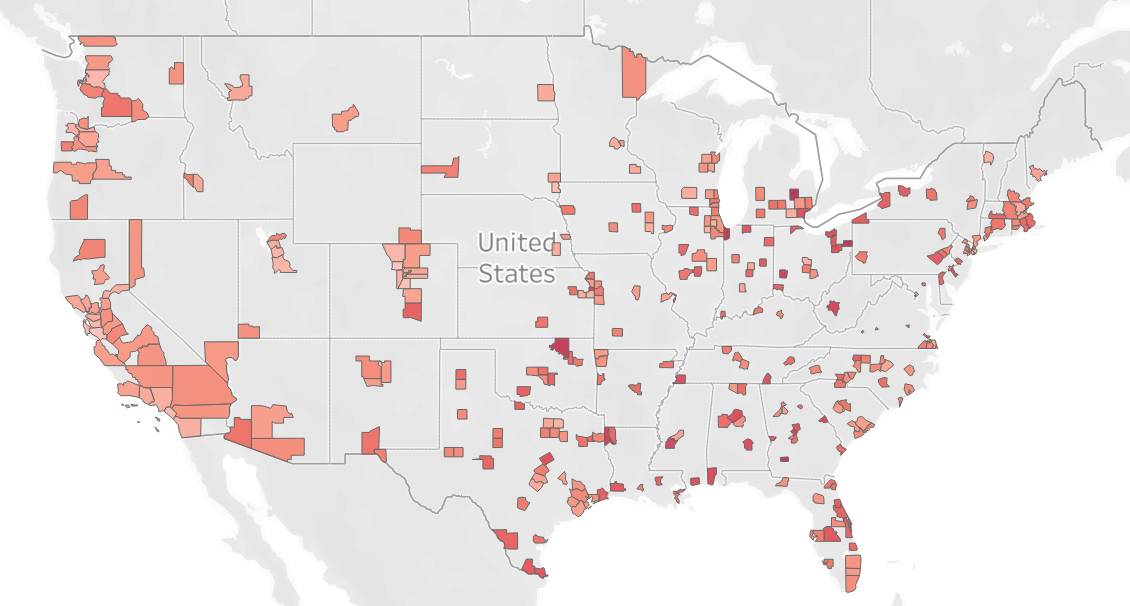

In [44]:
Image(filename='/Users/ginabarbagallo/Desktop/keyviz1-map.png')

To access the visualization on Tableau Public use this link: https://public.tableau.com/shared/52CR5KXB2?:display_count=n&:origin=viz_share_link

As you can see by the map created, the counties in darker shades of red represent those with more problems with food accessibility. Although the score range is low, with a longer timeframe, more distinct scores could be applied, or all counties in the US could be included to complete the map. 

## THE TOP 10 COUNTIES WHERE THE PROGRAM SHOULD BE IMPLEMENTED ARE: 
1. Genesee, MI (26049)
2. Mahoning, OH (39099)
3. Dougherty, GA (13095)
4. Lake, IN (18089)
5. Osage, OK (40113)
6. Caddo, LA (22017)
7. Montgomery, OH (39113)
8. Bibb, GA (13021)
9. Kanawka, WV (54039)
10. Hinds, MS (28049)

I am selecting the 10 top counties for the sake of the exercise; however, if we had information on the amount of resources and budget available for the program, I could run an optimization problem to obtain the number of counties or people we are able to support. 

# QUESTION 2
### How many people will be included? How many might be successfully engaged? 

In [45]:
#subsetting data to the top 10 counties
counties = geo_cities_with_access.groupby('FIPS_y')['Population2010'].sum().reset_index()
counties.head(1)

,FIPS_y,Population2010
0,01073,268987


In [46]:
counties10 = ['26049', '39099', '13095','18089','40113','22017','39113', '13021', '54039','28049']  # Example FIPS codes to keep
counties10_info = counties[counties["FIPS_y"].isin(counties10)]

counties10_info.head(10) 

,FIPS_y,Population2010
72,13021,90876
76,13095,77434
101,18089,161124
121,22017,196589
138,26049,102395
151,28049,172891
211,39099,66971
212,39113,141359
219,40113,6136
315,54039,51351


In [47]:
#look at the % of seniors with low food access in each county
counties10_info = pd.merge(counties10_info, food_access, left_on='FIPS_y', right_on = 'FIPS', how='left')
counties10_info.head(10)

,FIPS_y,Population2010,index,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,13021,90876,397,13021,GA,Bibb,35466.274259,38423.196751,8.337280,22.801002,...,1234.258924,0.793496,509.705330,0.327686,91.658153,0.058926,27.472742,0.017662,1095.702557,0.704419
1,13095,77434,433,13095,GA,Dougherty,39406.191140,36949.568249,-6.234104,41.671011,...,661.417505,0.699432,227.278011,0.240341,80.130629,0.084736,34.217564,0.036184,661.973673,0.700020
2,18089,161124,741,18089,IN,Lake,138588.469579,147709.011983,6.581025,27.940942,...,16133.106320,3.252610,1800.474564,0.362995,410.323467,0.082726,37.424369,0.007545,8595.760888,1.732999
3,22017,196589,1121,22017,LA,Caddo,84385.298319,82925.401466,-1.730037,33.096297,...,2009.347887,0.788075,967.782654,0.379569,314.130452,0.123203,33.902011,0.013297,1900.767111,0.745489
4,26049,102395,1255,26049,MI,Genesee,127082.031707,134363.930746,5.730078,29.846176,...,3881.694051,0.911645,1847.644383,0.433933,652.448721,0.153233,21.170754,0.004972,4047.138363,0.950501
5,28049,172891,1425,28049,MS,Hinds,67857.833564,64739.626747,-4.595205,27.664893,...,792.313684,0.323018,311.074579,0.126822,105.586472,0.043046,4.891682,0.001994,810.149804,0.330289
6,39099,66971,2092,39099,OH,Mahoning,69801.176213,63368.719888,-9.215398,29.227158,...,3396.064588,1.422001,535.181560,0.224091,123.713650,0.051801,11.408339,0.004777,2582.405558,1.081305
7,39113,141359,2099,39113,OH,Montgomery,158183.232590,142425.887582,-9.961451,29.558506,...,2500.145500,0.467183,2708.970497,0.506205,298.213398,0.055725,29.124159,0.005442,4052.079024,0.757181
8,40113,6136,2187,40113,OK,Osage,13639.413131,14890.982488,9.176123,28.731490,...,425.646078,0.896626,46.529622,0.098015,1793.507124,3.778032,2.383319,0.005020,1262.824032,2.660145
9,54039,51351,3012,54039,WV,Kanawha,48213.839312,46874.897605,-2.777090,24.973112,...,414.606579,0.214752,679.723662,0.352074,85.203794,0.044133,6.880472,0.003564,1098.744695,0.569112


In [48]:
socioeconomic_data = pd.read_excel("/Users/ginabarbagallo/Downloads/FoodEnvironmentAtlas.xls", sheet_name='SOCIOECONOMIC')
socioeconomic_data.head(5)

,FIPS,State,County,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,1001,AL,Autauga,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,AL,Baldwin,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,AL,Barbour,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,AL,Bibb,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,AL,Blount,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0


In [49]:
socioeconomic_data['FIPS'] = socioeconomic_data['FIPS'].astype(str)
counties10_info = pd.merge(counties10_info, socioeconomic_data, on='FIPS', how='left')
counties10_info.head(2)

,FIPS_y,Population2010,index,FIPS,State_x,County_x,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,...,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,13021,90876,397,13021,GA,Bibb,35466.274259,38423.196751,8.337280,22.801002,...,0.047574,12.657910,25.792204,38870.0,26.7,0,41.6,1,1,0.0
1,13095,77434,433,13095,GA,Dougherty,39406.191140,36949.568249,-6.234104,41.671011,...,0.054989,12.115476,25.732565,34799.0,29.4,1,42.1,1,1,1.0


In [50]:
seniors_low_10 = counties10_info['LACCESS_SENIORS15'].sum()
print(seniors_low_10)

108600.05314822646


In [51]:
counties10_info.columns

Index(['FIPS_y', 'Population2010', 'index', 'FIPS', 'State_x', 'County_x',
       'LACCESS_POP10', 'LACCESS_POP15', 'PCH_LACCESS_POP_10_15',
       'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15', 'LACCESS_LOWI10',
       'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15', 'PCT_LACCESS_LOWI10',
       'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10', 'LACCESS_HHNV15',
       'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10', 'PCT_LACCESS_HHNV15',
       'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15', 'LACCESS_CHILD10',
       'LACCESS_CHILD15', 'LACCESS_CHILD_10_15', 'PCT_LACCESS_CHILD10',
       'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10', 'LACCESS_SENIORS15',
       'PCH_LACCESS_SENIORS_10_15', 'PCT_LACCESS_SENIORS10',
       'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15', 'PCT_LACCESS_WHITE15',
       'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15', 'LACCESS_HISP15',
       'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15', 'PCT_LACCESS_NHASIAN15',
       'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15', 'LACCESS_NHPI15',
       'PCT_LACCESS_NHPI1

### The number of people who will be included with the assumptions mentioned before (only considering seniors and only top 10 counties) is: 
## Approximately 108600
This approximation is considering all the assumptions I made throughout the process. 
The assumptions were:
1. Only working with seniors - the number should increase when we consider younger people with disabilities.
2. Only selecting the top 10 counties with the highest food insecurity - depending on the program budget and resources, it would be adjusted
3. Assuming everyone, every senior with low access to food is a member - I did this because I do not have information on % of seniors who have Medicare Advantage in each county, but with that information, I would be able to determine the number more precisely.
4. The data we have is for 500 cities, which means that we are only focusing on counties that are part of metro areas. This could change the analysis if we incorporate information from all counties in the US. 

To answer the second question, I used the following definition of engagement: how often the program members use the benefits offered. 
As we do not have any metrics in our current data on the member's engagement with previous or similar programs, I will use percentages from research. 

https://www.aarp.org/pri/topics/health/prevention-wellness/boosting-snap-participation-among-older-adults/ 
According to the American Association of Retired Persons,  63 % of adults ages 50 and older who were eligible for SNAP did not participate in the program. Considering this statistic, we expect about 37% of the selected people to be engaged in the program. 

Such a low percentage of engagement would allow us to look into outreach for the non-engaged and incorporate new counties into the program. 

In [52]:
# here I will calculate the engagement in the program
engagement_rate_research = 0.37
engaged_members  = seniors_low_10 * engagement_rate_research
print(engaged_members)


40182.01966484379


According to the engagement rate obtained from research and the number of people we targeted in the 10 counties, about 40.000 would be engaged in the program

# QUESTION 3
### Which population subgroup might benefit the most from the program?

findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: Font family 'Poppins' not found.
findfont: F

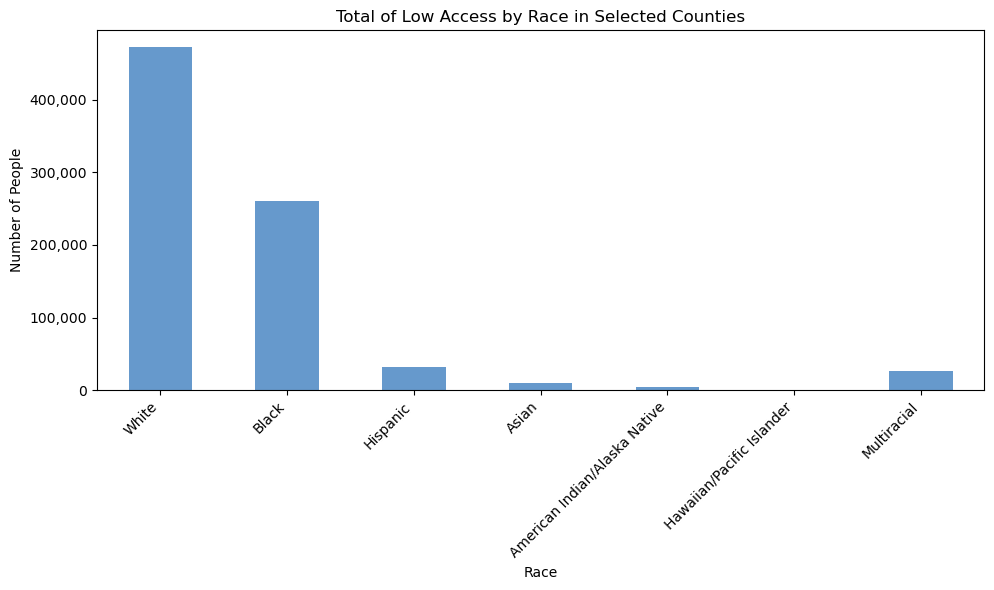

In [70]:
import matplotlib.ticker as ticker
race_totals_columns = [
    'LACCESS_WHITE15', 
    'LACCESS_BLACK15', 
    'LACCESS_HISP15', 
    'LACCESS_NHASIAN15', 
    'LACCESS_NHNA15', 
    'LACCESS_NHPI15', 
    'LACCESS_MULTIR15'
]
race_totals = counties10_info[race_totals_columns].sum()

# Create a bar chart for the total values
plt.figure(figsize=(10, 6))
race_totals.plot(kind='bar', legend=False, color = '#6699CC')

race_labels = ['White','Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native','Hawaiian/Pacific Islander', 'Multiracial']

# Customize the plot
plt.title('Total of Low Access by Race in Selected Counties')
plt.xlabel('Race')
plt.ylabel('Number of People')
plt.xticks(ticks = range(len(race_labels)), labels = race_labels, rotation=45, ha='right')
plt.tight_layout()
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Show the plot
plt.show()

In [145]:
#table of the population in all counties that is in persistent poverty
print(counties10_info.groupby('PERPOV10').size()) #one county is considered a persistent poverty county

PERPOV10
0    9
1    1
dtype: int64


In [151]:
median_poverty_rate = counties10_info['POVRATE15'].median()
print("The median poverty rate in the counties selected is:", average_poverty_rate)

The median poverty rate in the counties selected is: 19.1


In [152]:
median_household_income = counties10_info['MEDHHINC15'].median()
print("The median household income in the counties selected is:", median_household_income)

The median household income in the counties selected is: 43312.0


In [57]:
#table of counties that are metro areas vs not metro areas
print(counties10_info.groupby('METRO13').size()) #all the counties selected belong to metro areas

METRO13
1    10
dtype: int64


# QUESTION 4
### What is the projected impact of this program?

To project this program's impact on the community, we need to determine the metrics that will measure impact most accurately. 
I used the following resources to determine the projected impact: 
1. https://www.hungercenter.org/wp-content/uploads/2014/03/Assessing-Impact-A-Toolkit-for-Outcome-Measurement-in-Community-Food-Security-Programs-Rempel-and-Shobe.pdf
2. https://www.fns.usda.gov/research/snap/measuring-effect-snap-food-security
This research on the effect of snap after six months of deployment and its comparison to similar programs can help us determine the improvement in food access and security that these programs provide.
3. https://www.ncoa.org/article/7-important-health-benefits-of-snap/
4. https://newsroom.medline.com/patient-experience/food-as-medicine-the-benefits-of-healthy-eating-for-older-adults/#:~:text=Health%20plan%20food%20benefit%20programs%20help%20remove%20barriers%20to%20healthy%20eating,-Medicare%20Advantage%20and&text=A%20nutrient%2Drich%20diet%20is,average%20of%20%241%2C800%20each%20year
   4a.  Lower annual medical costs by an estimated average of $1,800 annually.
5. https://thefoodtrust.org/wp-content/uploads/2022/07/report_addressing-nutrition-and-food-access-in-medicaid_2021.original.pdf
The impact of these programs is not only related to eating but has a positive impact on health outcomes as well. It can prevent chronic disease, reduce healthcare costs and help seniors continue to live independently. 

Since we do not have information on the impact of other similar programs on the company's members, and we cannot wait for implementation to determine the impact,  I decided to use the percentage of reduction in food insecurity from similar programs such as SNAP (Supplemental Nutrition Assistance Program). 

In [66]:
#to calculate the $ saved in healthcare costs we need the number of engaged people and multiply by 1800 
saved_costs_user = 1800
saved_costs_total = saved_costs_user * engaged_members
print("The program would save patients", round(saved_costs_total,2), 'in healthcare costs in the first year.') 


The program would save patients 72327635.4 in healthcare costs in the first year.


In [154]:
#Obtain the percentage of people in the US with low access to food. 
total_people_lowaccess = food_access['LACCESS_POP15'].sum()
print("The total people in the US that have low access to food is:", total_people_lowaccess)

The total people in the US that have low access to food is: 60254922.83399637


In [157]:
#Obtain the percentage impacted by the program by dividing the potential engaged members with the total population
percent_people_impacted_by_program = engaged_members/total_people_lowaccess
print('The program would successfully engage',percent_people_impacted_by_program,'of the total population in the US with low access')

The program would successfully engage 1.0 of the total population in the US with low access
